# WI4475 homework 2 2020

This model computes the position and velocity of a free-falling object. The only two forces acting are gravity and air friction. We use newton's famous $F=m a$ to create a simple model. 

$m a = F_{gravity} + F_{friction}$

We consider a sphere with radius $r$ and density $\rho_o$. For friction we use a quadratic dag law $F_{friction}=-\rho_a c_d |u|u$
Resulting in the model

$du/dt = -g -(3 \rho_a c_d)/(\rho_o r) |u|u$

__Please, be aware that the TensorFlow syntax changed a lot from version 1 to 2. This code uses version 2 syntax__

## import packages

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from math import pi

In [2]:
# read measurements from file
data = np.genfromtxt('data.csv', delimiter=' ')

In [18]:
dt   =0.1                 #time-step [s]
T    =10.0                #end-time of simulation
g    =tf.Variable(9.81)   #acceleration of gravity [m/s^2]
rho_o=tf.Variable(1000.0) #density of object [kg/m^3]
r    =tf.Variable(0.05)   #radius of spherical object
cd   =tf.Variable(0.45)   #drag coefficient for a sphere (0.47) 
                          #https://en.wikipedia.org/wiki/Drag_coefficient
rho_a=tf.Variable(1.25)   #density of air

beta = 3*rho_a*cd/(rho_o*r)
z=tf.Variable(0.0)        #initial position
u=tf.Variable(0.0)        #initial velocity

In [19]:
i=0
times=np.arange(dt,T,dt) 
all_u=np.zeros(len(times)) #collect data for a plot
cost=tf.Variable(0.0)
for t in times:
    z = z + dt*u
    u = u + dt*(-g-beta*abs(u)*u)
    all_u[i]=u.numpy()
    #print("t=%f z=%f u=%f"%(t,z,u))
    z_obs=data[i,1]
    #print("t=%f z=%f z_obs=%f"%(t,z,z_obs))
    cost=cost+(z_obs-z)**2
    i=i+1
cost_norm=cost/i #normalize by number of elements
print("cost_norm=%f"%(cost_norm))

cost=1.960806


Text(0.5, 1.0, 'Fall velocity')

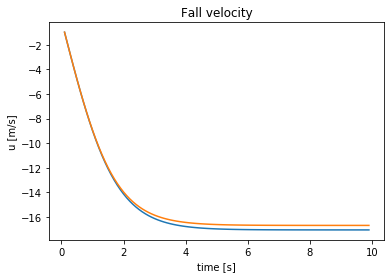

In [22]:
plt.plot(times,all_u)         #computed velocity
plt.plot(data[:,0],data[:,2]) #measured velocity
plt.xlabel("time [s]")
plt.ylabel("u [m/s]")
plt.title("Fall velocity")

## Automatic differentiation

The example below shows how automatic differentation works. One can only compute derivatives with respect to variables of type tf.Variable and 'watched' variables.

[tensorflow autodiff docu](https://www.tensorflow.org/tutorials/customization/autodiff)

In [32]:
x=tf.Variable(1.0)
y=tf.Variable(2.0)
with tf.GradientTape(persistent=True) as tape: #normally the tape is cleared after one call to tf.gradient
    z = 2*x + y
    
#one at a time
dz_dx = tape.gradient(z,x)
print("dz/dx=%f"%(dz_dx))
dz_dy = tape.gradient(z,y)
print("dz/dy=%f"%(dz_dy))
#or a gradient in one call
dz_dxy=tape.gradient(z,[x,y])
print("grad(z) wrt (x,y) = ",np.array(dz_dxy))

dz/dx=2.000000
dz/dy=1.000000
grad(z) wrt (x,y) =  [2. 1.]


## Exercise

1. With the free-fall model and data, compute the derivatives of _cost_norm_ with respect to _cd_.  
2. Check the result with the finite difference approach.